# NOAA Weather Data EDA

## 1. Load and Import Packages 

In [8]:
import pandas as pd 
import numpy as np
import re
import os
import math
import datetime
from datetime import datetime
import time

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import pickle

import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

## 2. Set up File Paths

In [137]:
import_bucket = "C:/Users/Christian Conroy/Documents/2021_2022/Job Search/Applications/ATT/NOAA_Weather_Analysis/data/isd-lite/"

output_bucket = "C:/Users/Christian Conroy/Documents/2021_2022/Job Search/Applications/ATT/NOAA_Weather_Analysis/outputs/"

image_bucket = "C:/Users/Christian Conroy/Documents/2021_2022/Job Search/Applications/ATT/NOAA_Weather_Analysis/outputs/images/"

### California - 4 year example

#### 1. Ingest the data

In [128]:
isd_data_full = pd.read_csv(output_bucket + "Ca_16_20_isd_full.csv", encoding = "utf-8", low_memory=False)
isd_data_full['date'] = pd.to_datetime(isd_data_full['date'], format = '%Y-%m-%d')
isd_data_full.head()

,station_id,date,year,month,day,air_temp_cmin,air_temp_cmax,dew_pt_temp_cmin,dew_pt_temp_cmax,sea_lvl_press_hectoPamin,sea_lvl_press_hectoPamax,wnd_dir_360min,wnd_dir_360max,wnd_spd_mtrpersecmin,wnd_spd_mtrpersecmax,sky_conditionmin,sky_conditionmax,precip_hrlymin,precip_hrlymax,precip_6hr_accummin,precip_6hr_accummax,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END,for_merge,years,filename
0,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2016,690150-93121-2016
1,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2017,690150-93121-2017
2,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2018,690150-93121-2018
3,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2019,690150-93121-2019
4,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2020,690150-93121-2020


In [130]:
isd_data_full.columns #35

Index(['station_id', 'date', 'year', 'month', 'day', 'air_temp_cmin',
       'air_temp_cmax', 'dew_pt_temp_cmin', 'dew_pt_temp_cmax',
       'sea_lvl_press_hectoPamin', 'sea_lvl_press_hectoPamax',
       'wnd_dir_360min', 'wnd_dir_360max', 'wnd_spd_mtrpersecmin',
       'wnd_spd_mtrpersecmax', 'sky_conditionmin', 'sky_conditionmax',
       'precip_hrlymin', 'precip_hrlymax', 'precip_6hr_accummin',
       'precip_6hr_accummax', 'USAF', 'WBAN', 'STATION NAME', 'CTRY', 'STATE',
       'ICAO', 'LAT', 'LON', 'ELEV(M)', 'BEGIN', 'END', 'for_merge', 'years',
       'filename'],
      dtype='object')

#### 2. Time Series of avg highs and lows for state

Group by State and Convert to Long for Plotting

In [131]:
cols = isd_data_full.columns.tolist()
indices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25]
in_cols = [cols[i] for i in indices]

In [132]:
isd_df_state = isd_data_full[in_cols].groupby(by=['STATE', 'date', 'year','month','day'], dropna=False, as_index=False).mean()


In [133]:
cols = isd_df_state.columns.tolist()
indices = [0,1,2,3,4]
id_cols = [cols[i] for i in indices]
v_indices = range(5,21)
value_vars = [cols[i] for i in v_indices]

In [134]:
isd_state_data_full_long = isd_df_state.melt(id_vars=id_cols, value_vars=value_vars, var_name="Measurement", value_name="Value", ignore_index=True)

In [135]:
isd_state_data_full_long.head()

,STATE,date,year,month,day,Measurement,Value
0,CA,2016-01-01,2016.0,1.0,1.0,air_temp_cmin,-0.318000
1,CA,2016-01-02,2016.0,1.0,2.0,air_temp_cmin,1.524490
2,CA,2016-01-03,2016.0,1.0,3.0,air_temp_cmin,4.294000
3,CA,2016-01-04,2016.0,1.0,4.0,air_temp_cmin,6.917822
4,CA,2016-01-05,2016.0,1.0,5.0,air_temp_cmin,8.832039


Air Temp

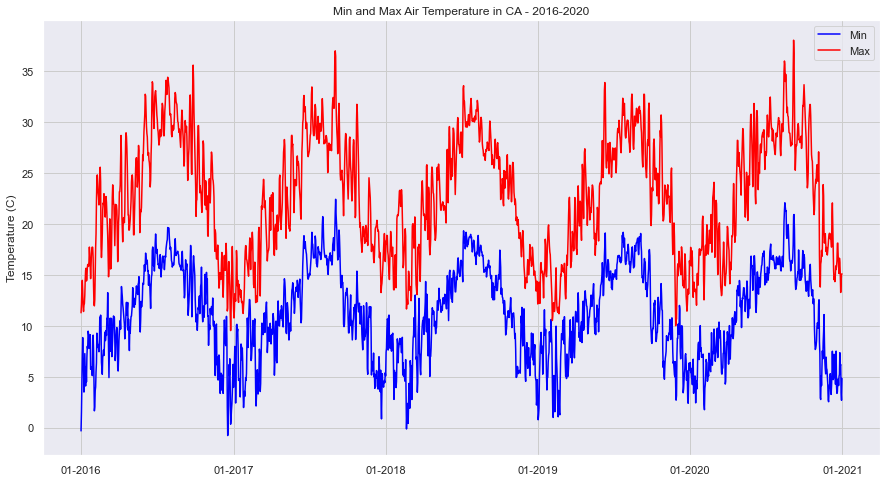

In [138]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "air_temp_cmin") | (isd_state_data_full_long['Measurement'] == "air_temp_cmax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Air Temperature in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Temperature (C)")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_airremp_ca.png')
plt.show()

In [139]:
isd_state_data_full_long['Measurement'].unique()

array(['air_temp_cmin', 'air_temp_cmax', 'dew_pt_temp_cmin',
       'dew_pt_temp_cmax', 'sea_lvl_press_hectoPamin',
       'sea_lvl_press_hectoPamax', 'wnd_dir_360min', 'wnd_dir_360max',
       'wnd_spd_mtrpersecmin', 'wnd_spd_mtrpersecmax', 'sky_conditionmin',
       'sky_conditionmax', 'precip_hrlymin', 'precip_hrlymax',
       'precip_6hr_accummin', 'precip_6hr_accummax'], dtype=object)

Dew Pt Temp

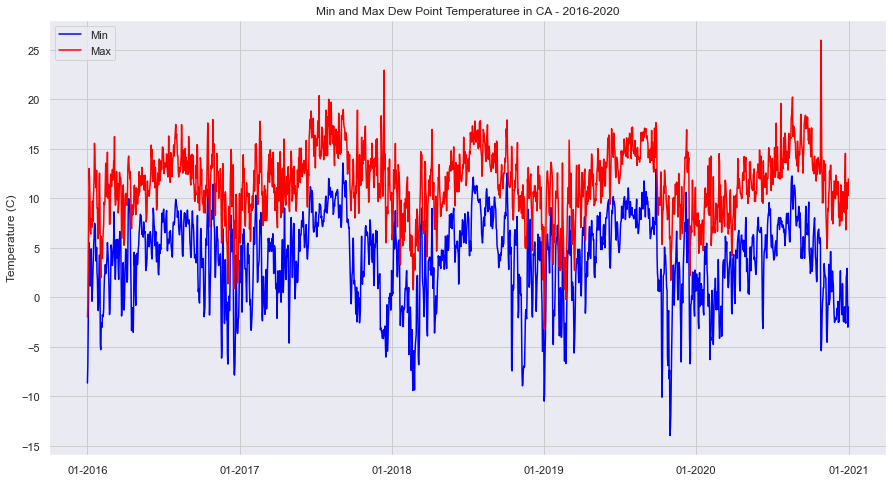

In [140]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "dew_pt_temp_cmin") | (isd_state_data_full_long['Measurement'] == "dew_pt_temp_cmax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Dew Point Temperaturee in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Temperature (C)")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_dewtempt_ca.png')
plt.show()

Sea Lvl Press

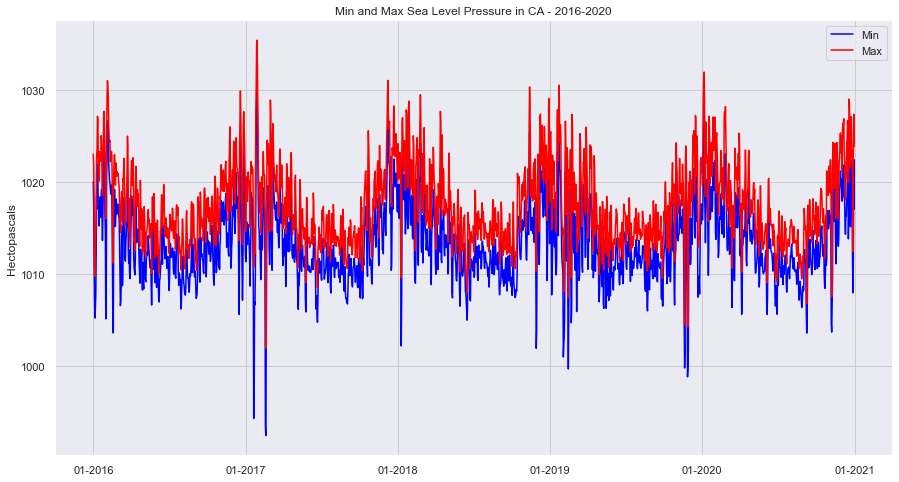

In [141]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "sea_lvl_press_hectoPamin") | (isd_state_data_full_long['Measurement'] == "sea_lvl_press_hectoPamax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Sea Level Pressure in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Hectopascals")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_sealevelpressure_ca.png')
plt.show()

Wind Dir

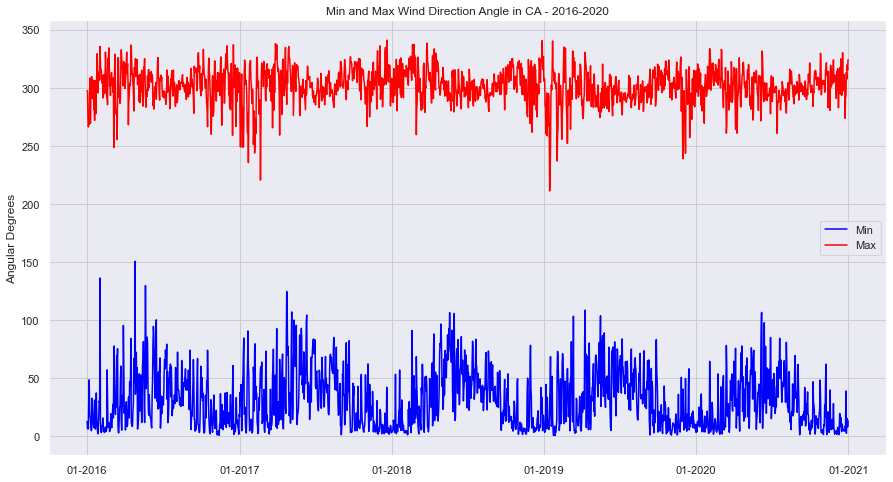

In [142]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "wnd_dir_360min") | (isd_state_data_full_long['Measurement'] == "wnd_dir_360max")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Wind Direction Angle in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Angular Degrees")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_dirangle_ca.png')
plt.show()

Wind Speed

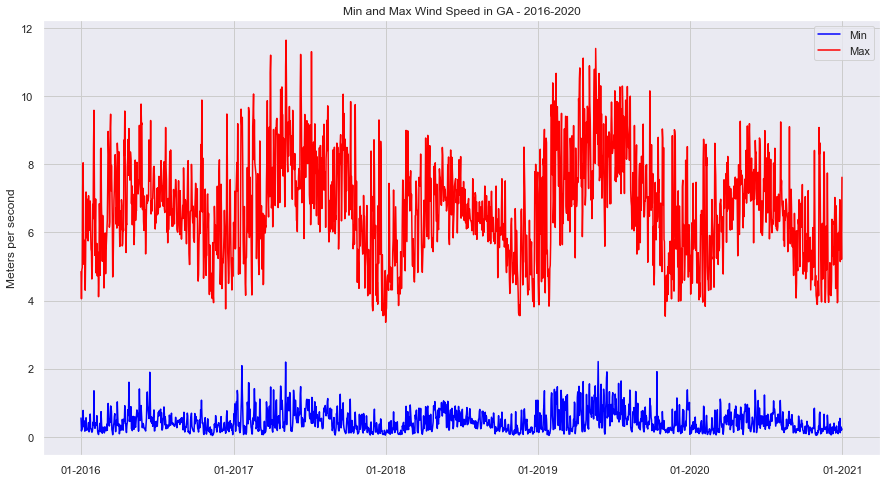

In [143]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "wnd_spd_mtrpersecmin") | (isd_state_data_full_long['Measurement'] == "wnd_spd_mtrpersecmax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Wind Speed in GA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Meters per second")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_windsp_ca.png')
plt.show()

Cloud Cover - consider deleting because of scale

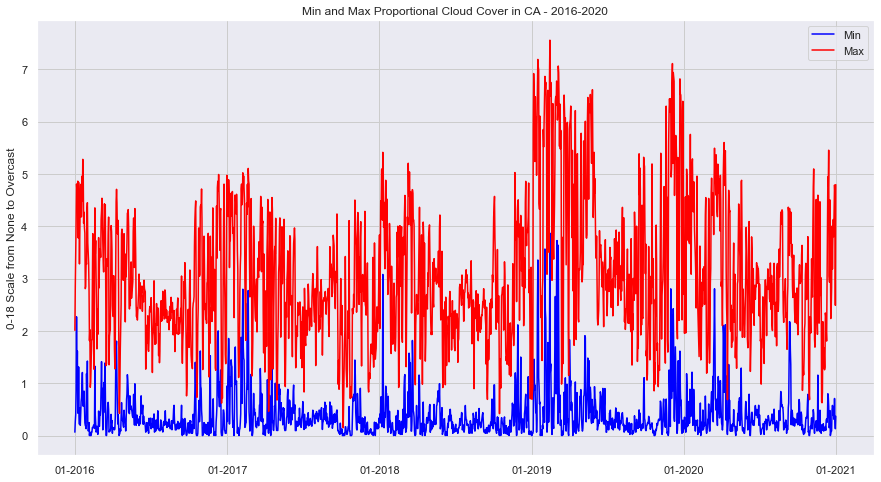

In [144]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "sky_conditionmin") | (isd_state_data_full_long['Measurement'] == "sky_conditionmax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Proportional Cloud Cover in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("0-18 Scale from None to Overcast")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_skycond_ca.png')
plt.show()

 Liquid Precipitation Depth Dimension - One Hour Duration

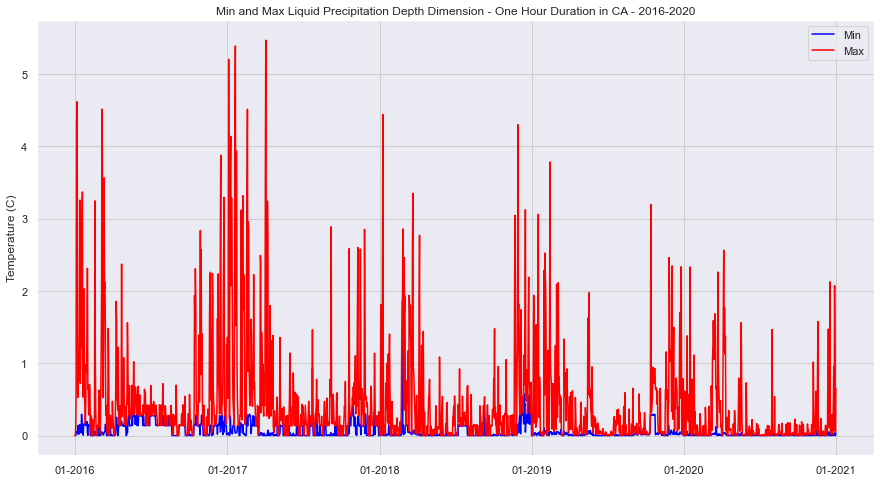

In [145]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "precip_hrlymin") | (isd_state_data_full_long['Measurement'] == "precip_hrlymax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Liquid Precipitation Depth Dimension - One Hour Duration in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Temperature (C)")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_preciphourly_ca.png')
plt.show()

 Liquid Precipitation Depth Dimension - Six Hour Duration

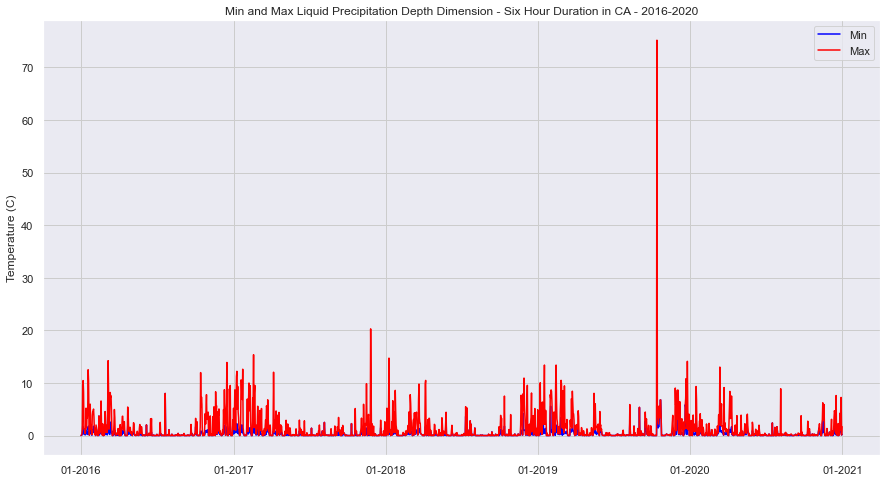

In [146]:
#Subset to Vars of Interest
sub_df = isd_state_data_full_long[(isd_state_data_full_long['Measurement'] == "precip_6hr_accummin") | (isd_state_data_full_long['Measurement'] == "precip_6hr_accummax")]

# Boilerplate to set up plots
sns.set()
plt.figure()

# Make the actual plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=sub_df, x="date", y="Value", hue = "Measurement", palette=['blue','red'], sort=False)

myFmt = mdates.DateFormatter('%m-%Y')

# Customize display properties
ax.set_title("Min and Max Liquid Precipitation Depth Dimension - Six Hour Duration in CA - 2016-2020")
ax.grid(color='#cccccc')
ax.set_ylabel("Temperature (C)")
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(None)

plt.legend(title=None, labels=['Min', 'Max'])

plt.savefig(image_bucket + 'min_max_precipsixhou_ca.png')
plt.show()

#### Categorical/Descriptive Information

##### Number of lows below freezing by year

In [147]:
cols = isd_data_full.columns.tolist()
indices = [1,2,3,4,5,25]
in_cols = [cols[i] for i in indices]

In [148]:
isd_df_state = isd_data_full[in_cols].groupby(by=['STATE', 'date', 'year','month','day'], dropna=False, as_index=False).min()

In [149]:
cols = isd_df_state.columns.tolist()
indices = range(0,5)
id_cols = [cols[i] for i in indices]
v_indices = [5]
value_vars = [cols[i] for i in v_indices]

In [150]:
isd_state_data_full_long = isd_df_state.melt(id_vars=id_cols, value_vars=value_vars, var_name="Measurement", value_name="Value", ignore_index=True)

In [151]:
isd_state_data_full_long['below_freezing'] = isd_state_data_full_long['Value'].apply(lambda x: "Below Freezing" if x <0 else "Above Freezing")

In [152]:
sub_df = isd_state_data_full_long[['STATE','year','below_freezing']].groupby(by=['STATE', 'year', 'below_freezing'], dropna=False, as_index=False).size()
sub_df = sub_df[sub_df['below_freezing'] == "Below Freezing"]
sub_df['year'] = sub_df['year'].astype('str')
sub_df['year'] = sub_df['year'].map(lambda x: str(x)[:-2])


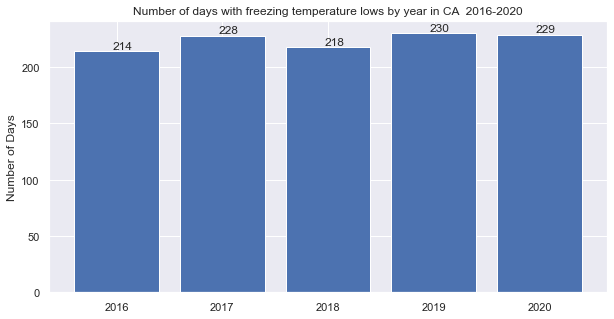

In [153]:
fig1, ax1 = plt.subplots(figsize=(10,5))

barplot = plt.bar(sub_df['year'], sub_df['size'])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.2, yval, int(yval), va='bottom') #va: vertical alignment y positional argument
    
plt.title("Number of days with freezing temperature lows by year in CA - 2016-2020")
plt.xlabel(None)
plt.ylabel("Number of Days")
plt.savefig(image_bucket + 'freezing_days_ca.png')
plt.show()

##### Number of days above C equivalent of 100 F

In [154]:
cols = isd_data_full.columns.tolist()
indices = [1,2,3,4,6,25]
in_cols = [cols[i] for i in indices]

isd_df_state = isd_data_full[in_cols].groupby(by=['STATE', 'date', 'year','month','day'], dropna=False, as_index=False).max()

cols = isd_df_state.columns.tolist()
indices = range(0,5)
id_cols = [cols[i] for i in indices]
v_indices = [5]
value_vars = [cols[i] for i in v_indices]

isd_state_data_full_long = isd_df_state.melt(id_vars=id_cols, value_vars=value_vars, var_name="Measurement", value_name="Value", ignore_index=True)

isd_state_data_full_long['above_100f'] = isd_state_data_full_long['Value'].apply(lambda x: "Above 100f" if x>37.7778 else "Below 100f")

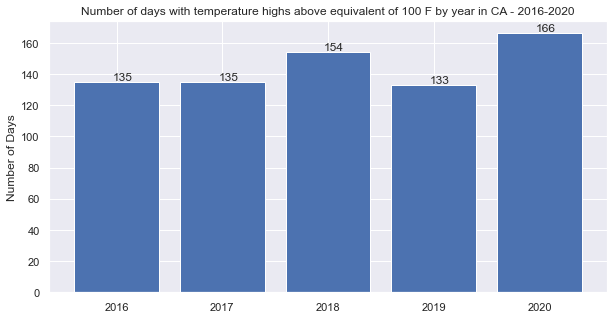

In [155]:
sub_df = isd_state_data_full_long[['STATE','year','above_100f']].groupby(by=['STATE', 'year', 'above_100f'], dropna=False, as_index=False).size()
sub_df = sub_df[sub_df['above_100f'] == "Above 100f"]
sub_df['year'] = sub_df['year'].astype('str')
sub_df['year'] = sub_df['year'].map(lambda x: str(x)[:-2])

fig1, ax1 = plt.subplots(figsize=(10,5))

barplot = plt.bar(sub_df['year'], sub_df['size'])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.2, yval, int(yval), va='bottom') #va: vertical alignment y positional argument
    
plt.title("Number of days with temperature highs above equivalent of 100 F by year in CA - 2016-2020")
plt.xlabel(None)
plt.ylabel("Number of Days")
plt.savefig(image_bucket + 'hot_days_ca.png')
plt.show()

#### 6. How many stations have been operating for the entire duration? For less than a year? For two? For three? 

In [156]:
isd_data_full.head()

,station_id,date,year,month,day,air_temp_cmin,air_temp_cmax,dew_pt_temp_cmin,dew_pt_temp_cmax,sea_lvl_press_hectoPamin,sea_lvl_press_hectoPamax,wnd_dir_360min,wnd_dir_360max,wnd_spd_mtrpersecmin,wnd_spd_mtrpersecmax,sky_conditionmin,sky_conditionmax,precip_hrlymin,precip_hrlymax,precip_6hr_accummin,precip_6hr_accummax,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END,for_merge,years,filename
0,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2016,690150-93121-2016
1,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2017,690150-93121-2017
2,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2018,690150-93121-2018
3,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2019,690150-93121-2019
4,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20220331,1,2020,690150-93121-2020


Based on where there is transaction data present in the data

In [157]:
# Fix Dates 
isd_data_full['BEGIN'] = pd.to_datetime(isd_data_full['BEGIN'], format='%Y%m%d')
isd_data_full['END'] = pd.to_datetime(isd_data_full['END'], format='%Y%m%d')

In [158]:
# Create var with contract length 
isd_data_full['from_start_gap'] = (isd_data_full['BEGIN'] - isd_data_full['date'].min()).dt.days
isd_data_full['from_start_gap'] = isd_data_full['from_start_gap'].apply(lambda x: 0 if x<0 else x)

isd_data_full['from_end_gap'] = (isd_data_full['date'].max() - isd_data_full['END']).dt.days
isd_data_full['from_end_gap'] = isd_data_full['from_end_gap'].apply(lambda x: 0 if x<0 else x)

isd_data_full['coverage_gap_days']= isd_data_full['from_start_gap'] + isd_data_full['from_end_gap'] 

isd_data_full['coverage_duryears']= ((365*len(isd_data_full['year'].unique().tolist()))-isd_data_full['coverage_gap_days'])/365

In [159]:
isd_data_full

,station_id,date,year,month,day,air_temp_cmin,air_temp_cmax,dew_pt_temp_cmin,dew_pt_temp_cmax,sea_lvl_press_hectoPamin,sea_lvl_press_hectoPamax,wnd_dir_360min,wnd_dir_360max,wnd_spd_mtrpersecmin,wnd_spd_mtrpersecmax,sky_conditionmin,sky_conditionmax,precip_hrlymin,precip_hrlymax,precip_6hr_accummin,precip_6hr_accummax,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END,for_merge,years,filename,from_start_gap,from_end_gap,coverage_gap_days,coverage_duryears
0,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,1990-01-02,2022-03-31,1,2016,690150-93121-2016,0,0,0,5.0
1,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,1990-01-02,2022-03-31,1,2017,690150-93121-2017,0,0,0,5.0
2,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,1990-01-02,2022-03-31,1,2018,690150-93121-2018,0,0,0,5.0
3,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,1990-01-02,2022-03-31,1,2019,690150-93121-2019,0,0,0,5.0
4,690150-93121,2016-01-01,2016.0,1.0,1.0,-1.7,8.9,-14.4,-11.7,1022.2,1025.5,0.0,330.0,0.0,6.2,0.0,0.0,NaN,NaN,NaN,NaN,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,1990-01-02,2022-03-31,1,2020,690150-93121-2020,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106515,999999-93245,2020-12-31,2020.0,12.0,31.0,8.3,12.5,NaN,NaN,NaN,NaN,NaN,NaN,0.7,4.6,NaN,NaN,0.0,1.8,NaN,NaN,999999,93245,BODEGA 6 WSW,US,CA,NaN,38.321,-123.075,19.2,2008-06-14,2022-03-31,1,2016,999999-93245-2016,0,0,0,5.0
1106516,999999-93245,2020-12-31,2020.0,12.0,31.0,8.3,12.5,NaN,NaN,NaN,NaN,NaN,NaN,0.7,4.6,NaN,NaN,0.0,1.8,NaN,NaN,999999,93245,BODEGA 6 WSW,US,CA,NaN,38.321,-123.075,19.2,2008-06-14,2022-03-31,1,2017,999999-93245-2017,0,0,0,5.0
1106517,999999-93245,2020-12-31,2020.0,12.0,31.0,8.3,12.5,NaN,NaN,NaN,NaN,NaN,NaN,0.7,4.6,NaN,NaN,0.0,1.8,NaN,NaN,999999,93245,BODEGA 6 WSW,US,CA,NaN,38.321,-123.075,19.2,2008-06-14,2022-03-31,1,2018,999999-93245-2018,0,0,0,5.0
1106518,999999-93245,2020-12-31,2020.0,12.0,31.0,8.3,12.5,NaN,NaN,NaN,NaN,NaN,NaN,0.7,4.6,NaN,NaN,0.0,1.8,NaN,NaN,999999,93245,BODEGA 6 WSW,US,CA,NaN,38.321,-123.075,19.2,2008-06-14,2022-03-31,1,2019,999999-93245-2019,0,0,0,5.0


In [160]:
sub_df = isd_data_full.groupby(by = ['station_id'], dropna = False, as_index = False).mean()
sub_df = sub_df.groupby(by = ['coverage_duryears'], dropna = False, as_index = False).size()
sub_df

,coverage_duryears,size
0,0.153425,1
1,1.109589,1
2,1.523288,1
3,3.065753,1
4,4.600000,1
5,5.000000,136


All stations but five have been operating over the entire reporting period. 

#### 7.  How many days of each year had threatening winds according to the National Weather Service Scale

Extreme

"An Extreme Threat to Life and Property from High Wind."
"Damaging high wind" with sustained speeds greater than 58 mph, or frequent wind gusts greater than 58 mph. Damaging wind conditions are consistent with a high wind warning.    

High

"A High Threat to Life and Property from High Wind."
"High wind" with sustained speeds of 40 to 57 mph. Wind conditions consistent with a high wind warning. 

Moderate

"A Moderate Threat to Life and Property from High Wind."
"Very windy" with sustained speeds of 26 to 39 mph, or frequent wind gusts of 35 to 57 mph. Wind conditions consistent with a wind advisory. 

Low

"A Low Threat to Life and Property from High Wind."
"Windy" conditions. Sustained wind speeds of 21 to 25 mph, or frequent wind gusts of 30 to 35 mph.

Very Low
" A Very Low Threat to Life and Property from High Wind."
"Breezy" to "Windy" conditions. Sustained wind speeds around 20 mph, or frequent gusts of 25 to 30 mph.

Non-Threatening
" No Discernable Threat to Life and Property from High Wind."
The sustain wind speeds are non-threatening; "breezy" conditions may still be present.Extreme

"An Extreme Threat to Life and Property from High Wind."
"Damaging high wind" with sustained speeds greater than 58 mph, or frequent wind gusts greater than 58 mph. Damaging wind conditions are consistent with a high wind warning.    

High

"A High Threat to Life and Property from High Wind."
"High wind" with sustained speeds of 40 to 57 mph. Wind conditions consistent with a high wind warning. 

Moderate

"A Moderate Threat to Life and Property from High Wind."
"Very windy" with sustained speeds of 26 to 39 mph, or frequent wind gusts of 35 to 57 mph. Wind conditions consistent with a wind advisory. 

Low

"A Low Threat to Life and Property from High Wind."
"Windy" conditions. Sustained wind speeds of 21 to 25 mph, or frequent wind gusts of 30 to 35 mph.

Very Low
" A Very Low Threat to Life and Property from High Wind."
"Breezy" to "Windy" conditions. Sustained wind speeds around 20 mph, or frequent gusts of 25 to 30 mph.

Non-Threatening
" No Discernable Threat to Life and Property from High Wind."
The sustain wind speeds are non-threatening; "breezy" conditions may still be present.

In [161]:
cols = isd_data_full.columns.tolist()
indices = [1,2,3,4,14,25]
in_cols = [cols[i] for i in indices]

In [162]:
isd_df_state = isd_data_full[in_cols].groupby(by=['STATE', 'date', 'year','month','day'], dropna=False, as_index=False).max()

In [163]:
isd_df_state.head()

,STATE,date,year,month,day,wnd_spd_mtrpersecmax
0,CA,2016-01-01,2016.0,1.0,1.0,11.3
1,CA,2016-01-02,2016.0,1.0,2.0,9.3
2,CA,2016-01-03,2016.0,1.0,3.0,12.9
3,CA,2016-01-04,2016.0,1.0,4.0,11.8
4,CA,2016-01-05,2016.0,1.0,5.0,15.4


In [164]:
#1 meter per second = 2.2369 miles per hour, accurate to 5 significant figures.
# Don't forget to look at scale!
isd_df_state['wnd_spd_mlesperhourmax'] = isd_df_state['wnd_spd_mtrpersecmax'] * 2.2369

In [165]:
def wind_freq(x):
    if x < 25:
        cat = "Non-Threatening"
    elif ((x >= 25) & ( x <30)):
        cat = "Very Low"
    elif ((x >= 30) & ( x <35)):
        cat = "Low"
    elif ((x >= 35) & ( x <47)):
        cat = "Moderate"
    elif ((x >= 47) & ( x <=57)):
        cat = "High"
    elif x >= 58:
        cat = "Exteme"
    else:
        cat= np.nan
    return cat
        
def wind_sus(x):
    if x < 20:
        cat = "Non-Threatening"
    elif ((x >= 20) & ( x <21)):
        cat = "Very Low"
    elif ((x >= 21) & ( x <=25)):
        cat = "Low"
    elif ((x >= 26) & ( x <=39)):
        cat = "Moderate"
    elif ((x >= 40) & ( x <=57)):
        cat = "High"
    elif x >= 58:
        cat = "Extreme"
    else:
        cat=np.nan
    return cat

In [166]:
isd_df_state['wind_freq_cat'] = isd_df_state['wnd_spd_mlesperhourmax'].apply(lambda x: wind_freq(x))
isd_df_state['wind_freq_sus'] = isd_df_state['wnd_spd_mlesperhourmax'].apply(lambda x: wind_sus(x))

In [167]:
isd_df_state.head()

,STATE,date,year,month,day,wnd_spd_mtrpersecmax,wnd_spd_mlesperhourmax,wind_freq_cat,wind_freq_sus
0,CA,2016-01-01,2016.0,1.0,1.0,11.3,25.27697,Very Low,NaN
1,CA,2016-01-02,2016.0,1.0,2.0,9.3,20.80317,Non-Threatening,Very Low
2,CA,2016-01-03,2016.0,1.0,3.0,12.9,28.85601,Very Low,Moderate
3,CA,2016-01-04,2016.0,1.0,4.0,11.8,26.39542,Very Low,Moderate
4,CA,2016-01-05,2016.0,1.0,5.0,15.4,34.44826,Low,Moderate


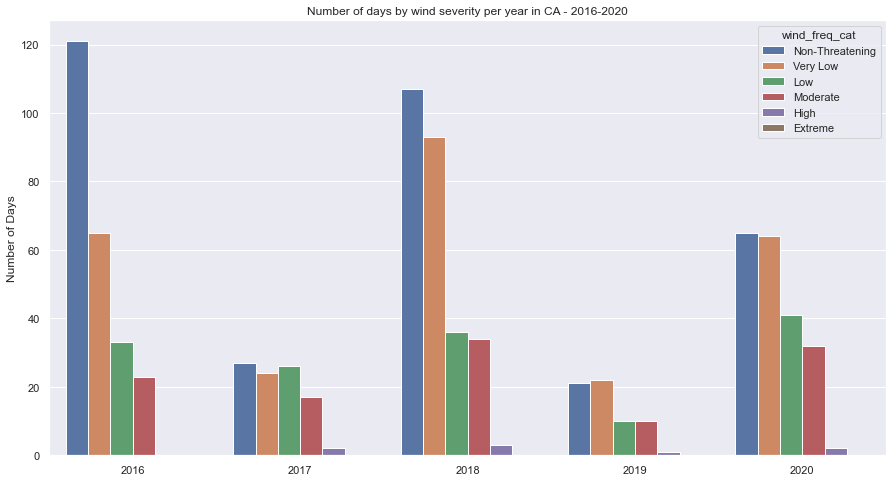

In [168]:
# Count of stations recording those categories by year
sub_df = isd_df_state[['STATE','year','wind_freq_cat']].groupby(by=['STATE', 'year', 'wind_freq_cat'], dropna=False, as_index=False).size()
sub_df['year'] = sub_df['year'].astype('str')
sub_df['year'] = sub_df['year'].map(lambda x: str(x)[:-2])
sub_df.head()

sns.barplot(x='year',y='size',hue='wind_freq_cat', hue_order = ['Non-Threatening', "Very Low", "Low", "Moderate", "High", "Extreme"], data=sub_df)
    
plt.title("Number of days by wind severity per year in CA - 2016-2020")
plt.xlabel(None)
plt.ylabel("Number of Days")
plt.savefig(image_bucket + 'high_wind_ca.png')
plt.show()
plt.show()

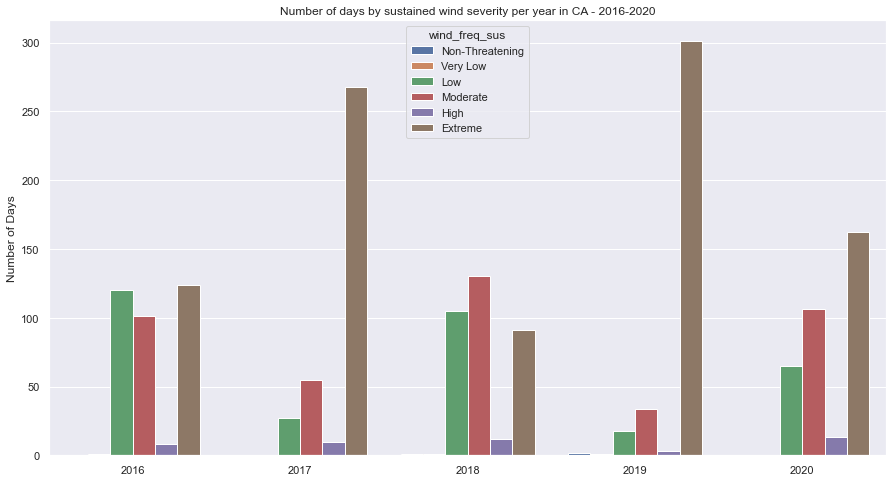

In [169]:
# Count of stations recording those categories by year
sub_df = isd_df_state[['STATE','year','wind_freq_sus']].groupby(by=['STATE', 'year', 'wind_freq_sus'], dropna=False, as_index=False).size()
sub_df['year'] = sub_df['year'].astype('str')
sub_df['year'] = sub_df['year'].map(lambda x: str(x)[:-2])
sub_df.head()

sns.barplot(x='year',y='size',hue='wind_freq_sus', hue_order = ['Non-Threatening', "Very Low", "Low", "Moderate", "High", "Extreme"],data=sub_df)
    
plt.title("Number of days by sustained wind severity per year in CA - 2016-2020")
plt.xlabel(None)
plt.ylabel("Number of Days")
plt.savefig(output_bucket + 'high_wind_sus_ca.png')
plt.show()
plt.show()